In [140]:
import pandas as pd
import os
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.integrate import simps
import time
import numpy as np


In [141]:
directory = r'C:\Users\mtirb\Documents\MSci-Project\Data\Calibrated Data'
files = [filename for filename in os.listdir(directory) if filename.endswith(".csv")]
file = files[20]
df = pd.read_csv(os.path.join(directory, file))

tot = df.Total_Forces.values
t = df.Time.values


In [142]:
def integral_limits(total_force_data):
        """ Uses scipy.signal.find_peaks to find peaks in F(t) curve. 
        
        Peaks here signify mid-point in transition from left to right 
        foot (or vice-versa) """

        peaks, _ = find_peaks(total_force_data, prominence=1)
    
    
        return list([peaks[0], peaks[-1]])

In [143]:
int_lims = integral_limits(tot)

a = int_lims[0]
b = int_lims[1]



In [144]:
def integrate_simps(total_forces, time, a, b):
    """ total_forces: F
        time: makes F -> F(t)
        a: lower integration bound (start of gait cycle)
        b: upper integration bound (end of gait cycle)
        """
    integrand = total_forces[a:b+1]
    time_interval = time[a:b+1]
    area = simps(y=integrand, x=time_interval)
    
    return area 

1.6128073988561729
500 499


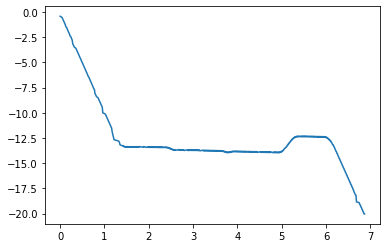

In [145]:
area = simps(y=tot[a:b+1], x=t[a:b+1])

W = area/(t[b+1]-t[a])

print(W/9.81)

new_integrand = (9.81/W)*(tot-W)

v = []

for i in range(1,len(t)+1):
    areas = simps(y=new_integrand[0:i+1], x=t[0:i+1])
    v.append(areas)

print(len(v), len(t[:-1]))

plt.plot(t, np.array(v))
plt.show()

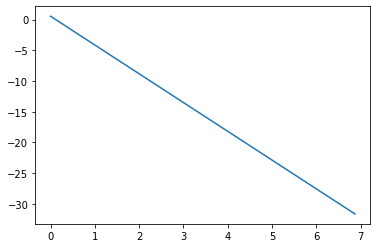

In [146]:
m, c = np.polyfit(t ,new_integrand, 1)

plt.plot(t, t*c +m)
plt.show()

0.8431085695024462 1.6128073988561729
1.5kg_(13-04-2020)_11-13-03.csv


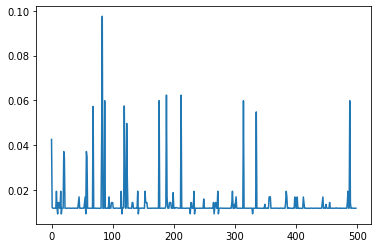

In [150]:
W2 = W*(1+(c/9.81))

print(W2/9.81, W/9.81)

print(file)

plt.plot(np.diff(t))
plt.show()